<a href="https://colab.research.google.com/github/ocoropuj/PHYS434/blob/main/PHYS434_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries & Data

In [1]:
import numpy as np
import math
import pandas as pd
import statistics
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt


# Part I: statistical analysis

In [2]:
data = pd.read_csv('HTRU.csv')

In [3]:
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

In [4]:
columns = data.columns.tolist()

## Integrated Profile

In [5]:
#Define dataframes for the integrated profile
dfI1 = class_1[columns[:4]]
dfI0 = class_0[columns[:4]]
under80 = data[data['Mean of the integrated profile.'] < 80]

#Calculate probabilities of being class 1 or 0 or µ<80
p_c1 = len(class_1)/len(data)
p_c0 = len(class_1)/len(data)
p_under80 = len(data[data['Mean of the integrated profile.'] < 80])/len(data)

#Calculate intersection probabilities
p_under80_and_c1 = len(class_1[class_1['Mean of the integrated profile.'] < 80])/len(data)

#Calculate Conditional Probabilities. Could also use Bayes' theorem and yileds the same answer P(A|B) = P(B|A) · P(A) / P(B).
p_under80_given_c1 = len(class_1[class_1['Mean of the integrated profile.'] < 80])/len(class_1)
p_c1_given_under80 = len(under80[under80['Class'] == 1])/len(under80)

#Print probabilities
print(f'P(X∈Class 1) ≈ {100*p_c1:.2f}%; P(µ<80) ≈ {100*p_under80:.2f}%; P(µ<80⋂X∈Class 1) ≈ {100*p_under80_and_c1:.2f}%')
print(f'P(µ<80 | X∈Class 1) ≈ {100*p_under80_given_c1:.2f}%; P(X∈Class 1| µ<80) ≈ {100*p_c1_given_under80:.2f}%' )


P(X∈Class 1) ≈ 9.16%; P(µ<80) ≈ 8.63%; P(µ<80⋂X∈Class 1) ≈ 6.90%
P(µ<80 | X∈Class 1) ≈ 75.35%; P(X∈Class 1| µ<80) ≈ 79.99%


Mean of the integrated profile.


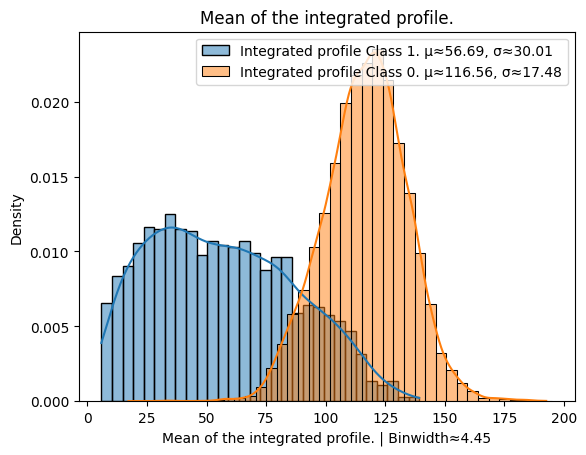

Standard deviation of the integrated profile.


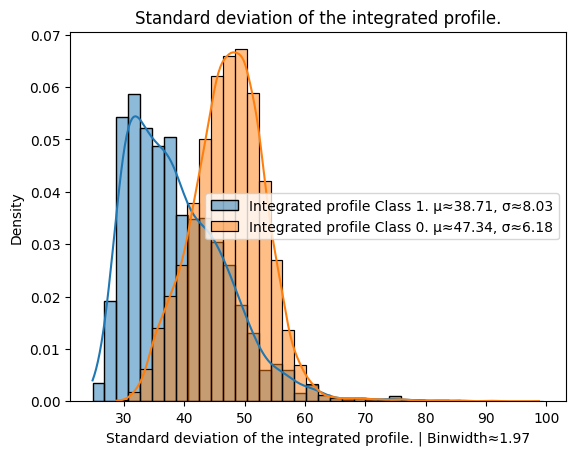

Excess kurtosis of the integrated profile.


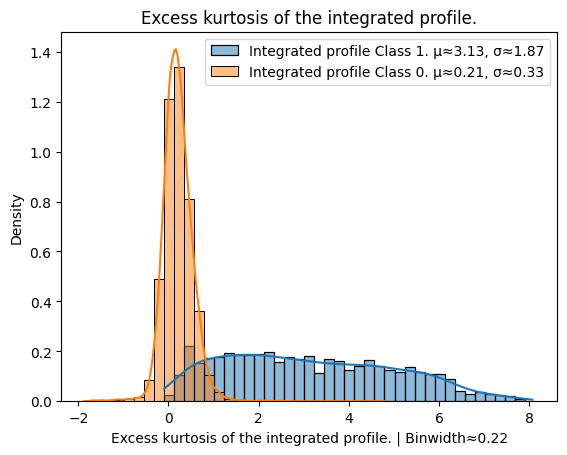

Skewness of the integrated profile.


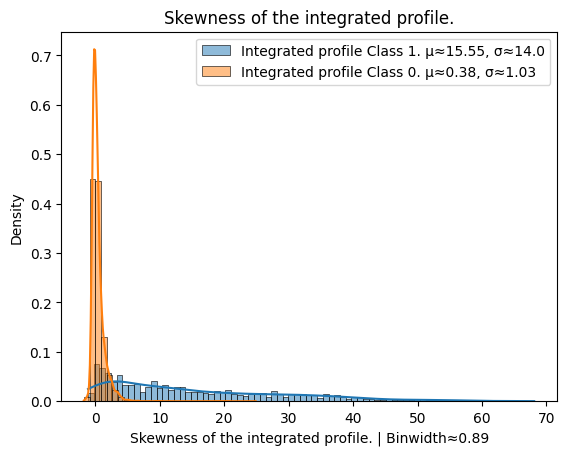

In [6]:
bins = 30
binwidth = 5

for i, col in enumerate(dfI1.columns.tolist()):
    binwidth = min((max(dfI1[col].values) - min(dfI1[col].values))/bins,(max(dfI0[col].values) - min(dfI0[col].values))/bins)

    print(col)

    sns.histplot(dfI1[col].values, stat='density', kde=True, binwidth=binwidth,  label=f'Integrated profile Class 1. µ≈{round(dfI1[col].mean(),2)}, σ≈{round(dfI1[col].std(),2)}')
    sns.histplot(dfI0[col].values, stat='density', kde=True, binwidth=binwidth, label=f'Integrated profile Class 0. µ≈{round(dfI0[col].mean(),2)}, σ≈{round(dfI0[col].std(),2)}')

    plt.ylabel('Density')
    plt.xlabel(f'{col} | Binwidth≈{round(binwidth,2)}')
    plt.title(col)
    plt.legend()
    plt.show()


## DM-SNR curve

In [7]:
dfD1 = class_1[columns[4:-1]]
dfD0 = class_0[columns[4:-1]]
under80D = data[data['Mean of the DM-SNR curve.'] < 80]


#Calculate probabilities of being class 1 or 0 or µ<80
p_c1D = len(class_1)/len(data)
p_c0D = len(class_1)/len(data)
p_under80D = len(data[data['Mean of the DM-SNR curve.'] < 80])/len(data)

#Calculate intersection probabilities
p_under80_and_c1D = len(class_1[class_1['Mean of the DM-SNR curve.'] < 80])/len(data)

#Calculate Conditional Probabilities. Could also use Bayes' theorem and yileds the same answer P(A|B) = P(B|A) · P(A) / P(B).
p_under80_given_c1D = len(class_1[class_1['Mean of the DM-SNR curve.'] < 80])/len(class_1)
p_c1_given_under80D = len(under80D[under80D['Class'] == 1])/len(under80D)

#Print probabilities
print(f'P(X∈Class 1) ≈ {100*p_c1D:.2f}%; P(µ<80) ≈ {100*p_under80D:.2f}%; P(µ<80⋂X∈Class 1) ≈ {100*p_under80_and_c1D:.2f}%')
print(f'P(µ<80 | X∈Class 1) ≈ {100*p_under80_given_c1D:.2f}%; P(X∈Class 1| µ<80) ≈ {100*p_c1_given_under80D:.2f}%' )


P(X∈Class 1) ≈ 9.16%; P(µ<80) ≈ 94.80%; P(µ<80⋂X∈Class 1) ≈ 6.93%
P(µ<80 | X∈Class 1) ≈ 75.72%; P(X∈Class 1| µ<80) ≈ 7.31%


Mean of the DM-SNR curve.


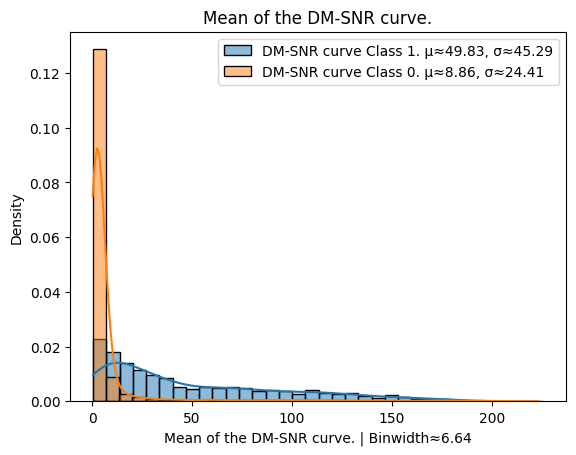

Standard deviation of the DM-SNR curve.


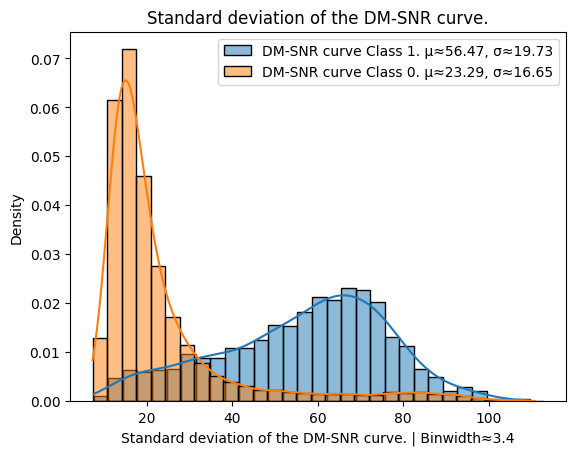

Excess kurtosis of the DM-SNR curve.


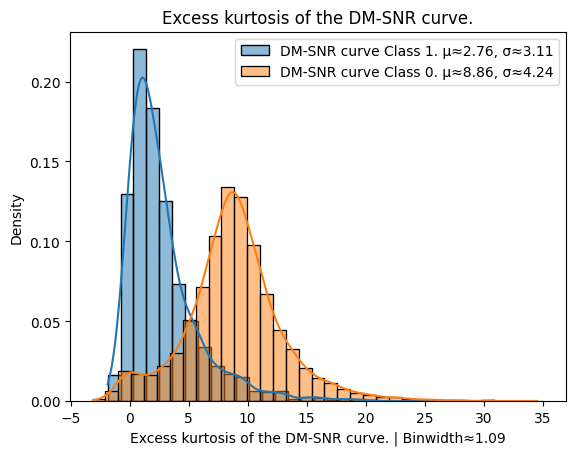

Skewness of the DM-SNR curve.


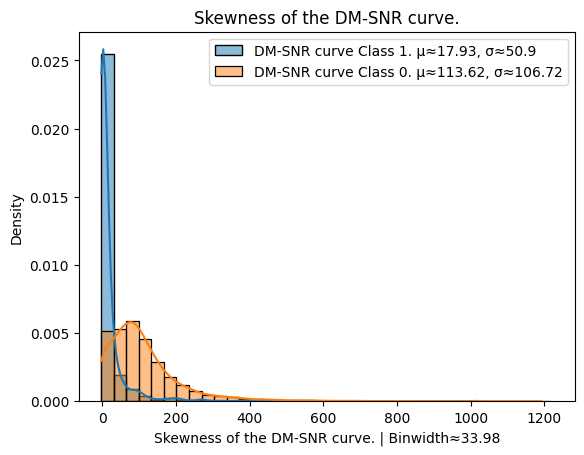

In [8]:
bins = 30
binwidth = 5

for i, col in enumerate(dfD1.columns.tolist()):
    binwidth = min((max(dfD1[col].values) - min(dfD1[col].values))/bins,(max(dfD0[col].values) - min(dfD0[col].values))/bins)

    print(col)

    sns.histplot(dfD1[col].values, stat='density', kde=True, binwidth=binwidth,  label=f'DM-SNR curve Class 1. µ≈{round(dfD1[col].mean(),2)}, σ≈{round(dfD1[col].std(),2)}')
    sns.histplot(dfD0[col].values, stat='density', kde=True, binwidth=binwidth, label=f'DM-SNR curve Class 0. µ≈{round(dfD0[col].mean(),2)}, σ≈{round(dfD0[col].std(),2)}')

    plt.ylabel('Density')
    plt.xlabel(f'{col} | Binwidth≈{round(binwidth,2)}')
    plt.title(col)
    plt.legend()
    plt.show()


# Part II: Normal Distribution

## Calculate cumulative probabaility from mean for Z = 1, 3 and 5.

In [9]:
def CPFM(Z=1):
    x = np.arange(0, Z, 0.001) # range of x in spec
    x_all = np.arange(0, Z+3, 0.001)

    y = norm.pdf(x,0,1)
    y_all = norm.pdf(x_all,0,1)

    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fivethirtyeight')
    ax.plot(x_all,y_all)

    ax.fill_between(x,y,0, alpha=0.3, color='b')

    ax.set_xlim([0,Z+3])
    ax.set_xlabel('Z')
    ax.set_yticklabels([])
    ax.set_title(f'Cumulative probability from mean for Z={Z}')

    return()


In [10]:
def CP(Z=1):
    x = np.arange(-4, Z, 0.001) # range of x in spec
    x_all = np.arange(-4, Z+3, 0.001)

    y = norm.pdf(x,0,1)
    y_all = norm.pdf(x_all,0,1)

    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fivethirtyeight')
    ax.plot(x_all,y_all)

    ax.fill_between(x,y,0, alpha=0.3, color='b')

    ax.set_xlabel('Z')
    ax.set_yticklabels([])
    ax.set_title(f'Cumulative probability for Z={Z}')

In [11]:
def CompP(Z=1):
    x = np.arange(Z, Z+3, 0.001) # range of x in spec
    x_all = np.arange(-4, Z+3, 0.001)

    y = norm.pdf(x,0,1)
    y_all = norm.pdf(x_all,0,1)

    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fivethirtyeight')
    ax.plot(x_all,y_all)

    ax.fill_between(x,y,0, alpha=0.3, color='b')

    ax.set_xlabel('Z')
    ax.set_yticklabels([])
    ax.set_title(f'Complementary Cumulative probability for Z={Z}')

Cumulative Probability from 0 to Z=1: 0.3413447
Cumulative Probability from 0 to Z=3: 0.4986501
Cumulative Probability from 0 to Z=5: 0.4999997


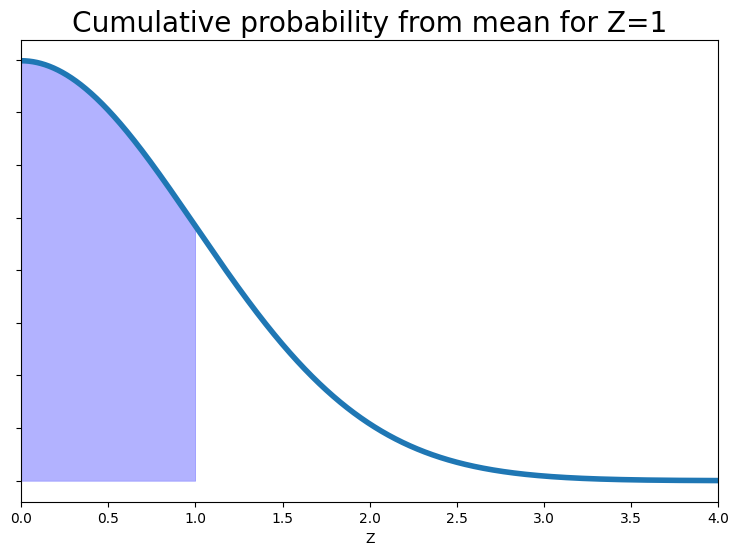

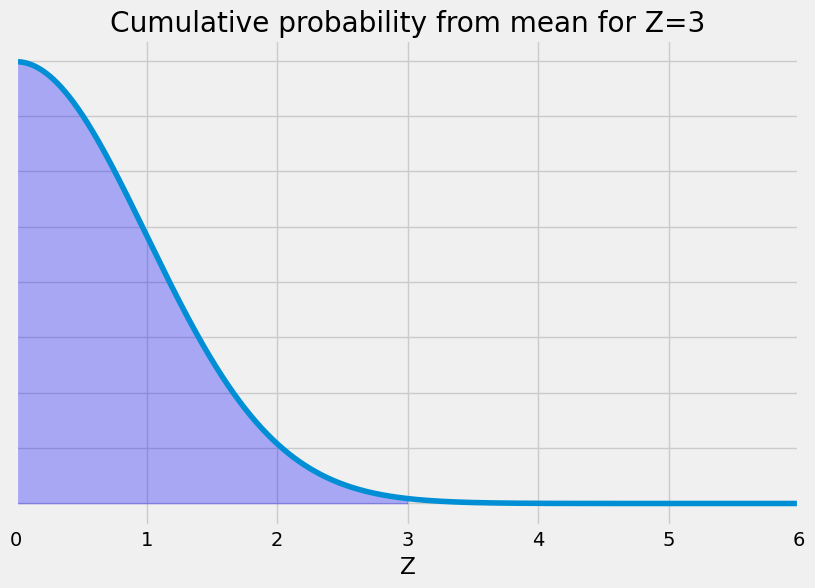

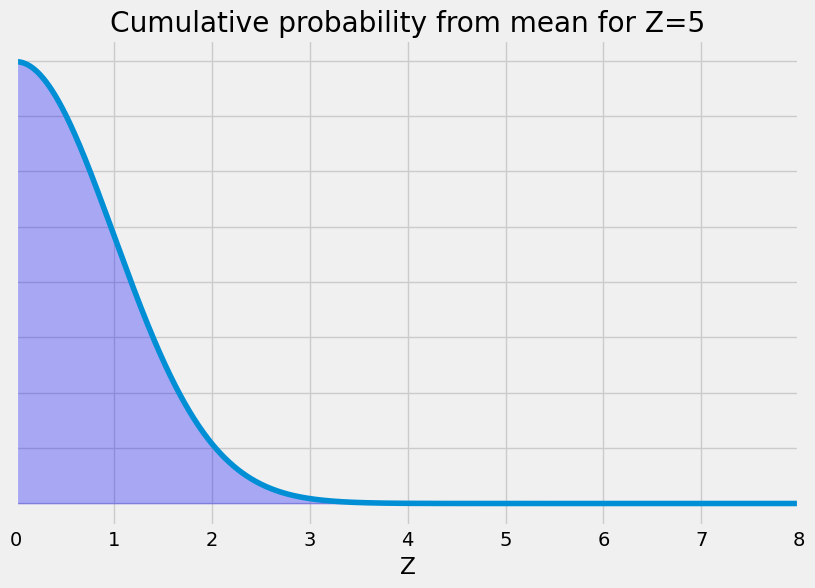

In [12]:
mu = 0
sigma = 1

# Define the values of Z for which you want to calculate cumulative probabilities
Z_values = [1, 3, 5]

# Calculate cumulative probabilities for each Z value
cumulative_probs = [stats.norm.cdf(Z)-stats.norm.cdf(0) for Z in Z_values]

# Print the results
for Z, prob in zip(Z_values, cumulative_probs):
    print(f"Cumulative Probability from 0 to Z={Z}: {prob:.7f}")
for Z in Z_values:
    CPFM(Z)

Cumulative Probability from -∞ to Z=1: 0.1586553
Cumulative Probability from -∞ to Z=3: 0.0013499
Cumulative Probability from -∞ to Z=5: 0.0000003


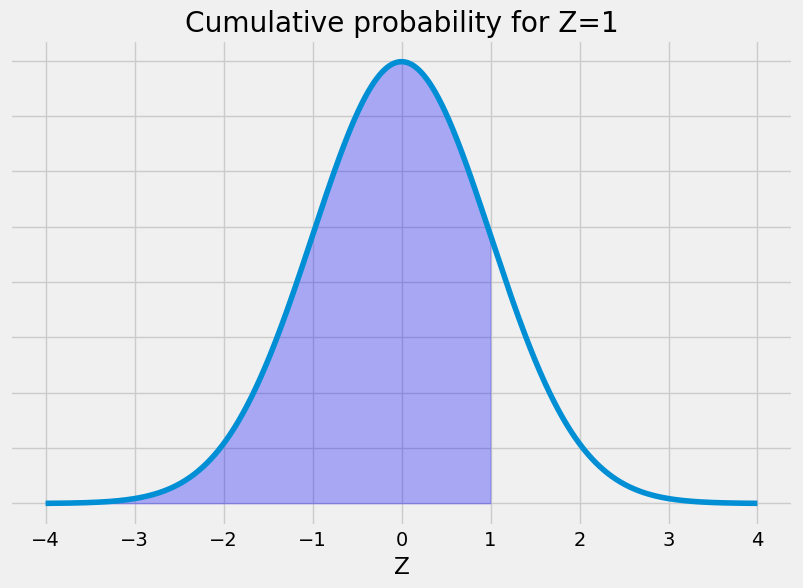

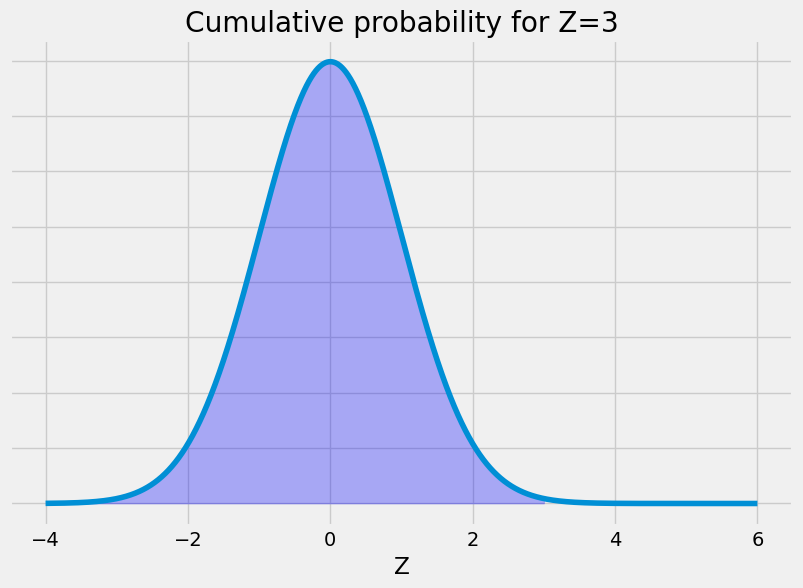

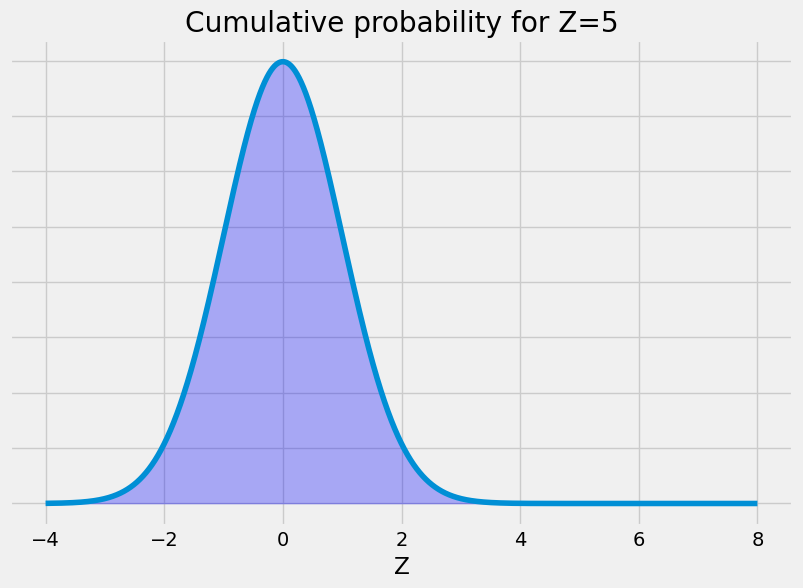

In [13]:
# Calculate cumulative probabilities for each Z value
cumulative_probs = [1-stats.norm.cdf(Z) for Z in Z_values]

# Print the results
for Z, prob in zip(Z_values, cumulative_probs):
    print(f"Cumulative Probability from -∞ to Z={Z}: {prob:.7f}")
for Z in Z_values:
    CP(Z)

Cumulative Probability from Z=1 to ∞: 0.15865525
Cumulative Probability from Z=3 to ∞: 0.00134990
Cumulative Probability from Z=5 to ∞: 0.00000029


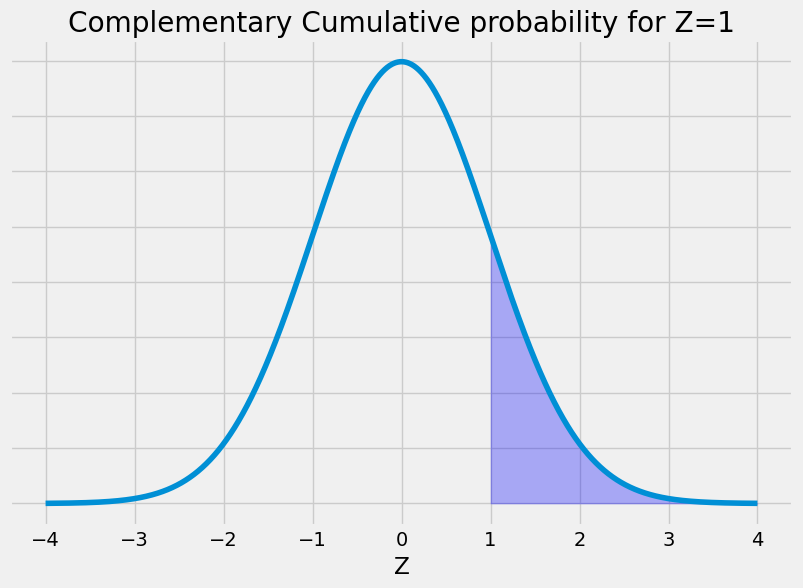

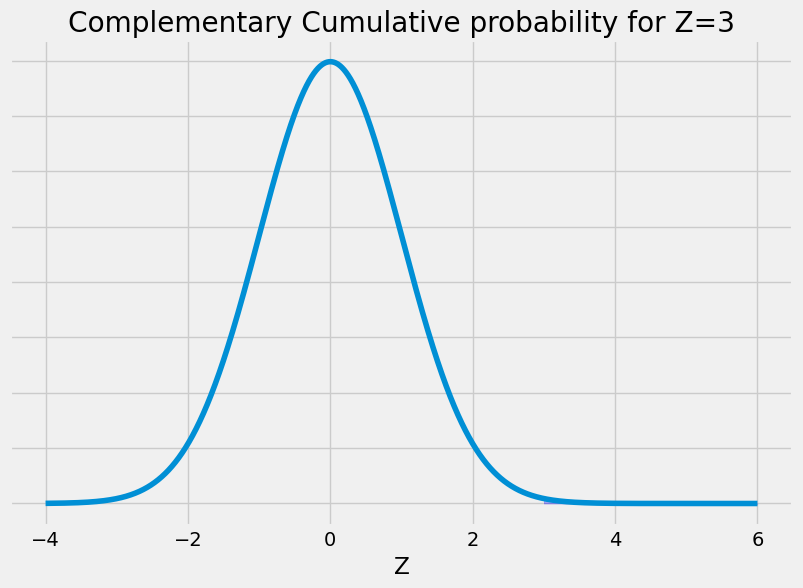

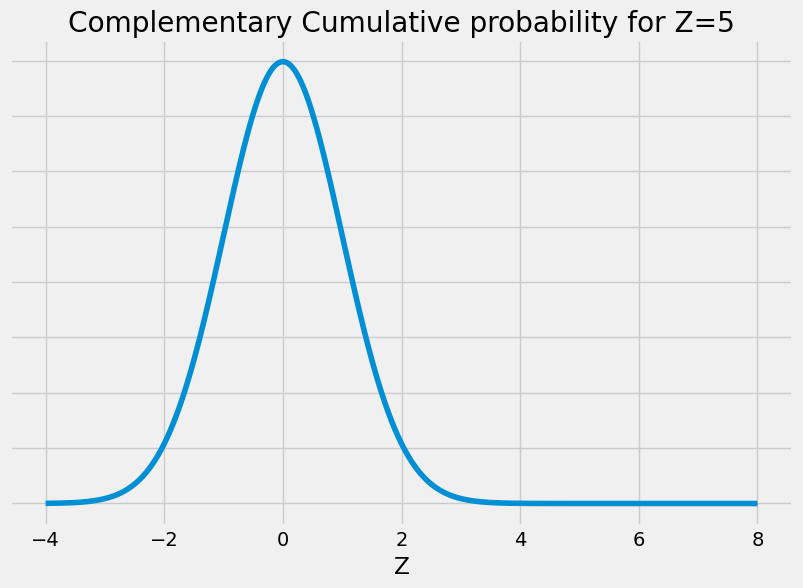

In [14]:
# Calculate cumulative probabilities for each Z value
cumulative_probs = [1-stats.norm.cdf(Z) for Z in Z_values]

# Print the results
for Z, prob in zip(Z_values, cumulative_probs):
    print(f"Cumulative Probability from Z={Z} to ∞: {prob:.8f}")

for Z in Z_values:
    CompP(Z)
